In [31]:
import numpy as np
import pandas as pd

In [32]:
import prepostprocessing.cleaning as cleaning
import prepostprocessing.pre_processing as preproc
from qapf import qapf
from qapf import cipw

___

# CIPWFULL normalized data

## Convert to CIPWFULL format

**I used an arbitrary version of the mineralogical data, not sure if this is the correct one** -->is a good one

In [33]:
mineralogy_original = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0)
# Only iterested in sample number and oxides
mineralogy = mineralogy_original[['SiO2', 'TiO2', 'Al2O3', 'Fe2O3','FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'l.i.', 'oth']]
mineralogy.columns

Index(['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O',
       'K2O', 'P2O5', 'l.i.', 'oth'],
      dtype='object')

In [34]:
# Check for closed sum
assert all(np.isclose(mineralogy.sum(axis=1), 100.0))

In [35]:
# Remove 'l.i.'' and 'oth' columns and immediately normalize data
mineralogy = preproc.normalize(mineralogy.drop(["l.i.", "oth"], axis=1))

In [36]:
# Check for closed sum
assert all(np.isclose(mineralogy.sum(axis=1), 100.0))

In [37]:
mineralogy.head()

SiO2      TiO2      Al2O3     Fe2O3       FeO       MnO       MgO  \
1  80.888978  0.040044  10.171188  0.610672  1.721894  0.010011  0.400440   
2  80.685830  0.100857  10.186586  0.171457  0.564801  0.020171  0.403429   
3  80.776228  0.050536   9.995957  0.161714  1.748534  0.020214  0.121286   
4  79.316869  0.039833   9.599681  1.145190  0.746863  0.099582  0.448118   
5  80.231026  0.081062  10.375925  0.648495  2.634512  0.040531  0.050664   

        CaO      Na2O       K2O      P2O5  
1  0.550606  2.002202  3.593953  0.010011  
2  0.353001  2.319718  5.143722  0.050429  
3  0.141500  0.758035  6.215888  0.010107  
4  0.667198  3.694483  4.232225  0.009958  
5  1.266592  1.540176  3.120884  0.010133

In [38]:
cipw.convert_to_CIPWFULL_format(mineralogy, "../_CIPW/test.txt", dataset_name="Vistelius (1995)")

_____

## Extract results from CIPWFULL results file

**I only selected quartz, plagioclase and alkali feldspar here as they are of interest to us for the QAPF classification**  
**Feel free to extract addiotnal minerals if they would be of any interest to you**

**Not sure what to do with albite in the final assignments as by the book it should be accounted for as an alkali feldspar and thus be included in the sum of plagioclase but then the resulting plagioclase contents seem quite low.   
This is something you might look into although the method used here seems to be correct according to te resulting QAPF diagram.**

--> indeed when reading the paper of Streckeisen (and other sources), albite should be accounted for as an alkali feldspar, also saw that the datapoints were generally located more to the right side (plagioclase), maybe an overestimation of plagioclase?

--> I changed the settings below so that albite belongs to the alkali feldspars, Think this figure should be more correct according to the papers, but the cotent of plagioclase is indeed quite low. 

In [39]:
df_final1 = cipw.extract_CIPW_results("../_CIPW/test_excel.txt")

In [40]:
df_final1

Q          P          K
 SAMPLE                                 
1        52.549507  16.940845  23.903175
2        45.940433  19.627420  31.816616
3        50.739986   6.413865  37.366406
4        41.407116  25.813734  25.008740
5        54.633030  13.031642  24.658770
...            ...        ...        ...
4655      0.000000  35.308239  41.011720
4656      0.185825  22.631033  41.595357
4657      0.497182  22.939609  44.296427
4658      0.000000  35.128437  46.071291
4659      2.255181  24.089815  42.645761

[4659 rows x 3 columns]

## QAPF classification

In [41]:
df_final1["QAPF"] = qapf.check_QAPF_region(df_final1)

In [42]:
df_final1["QAPF"].unique()

array(['monzo granite', 'syeno granite', 'quartz-rich granitoid',
       'granodiorite', 'tonalite', 'quartz monzonite',
       'quartz monzodiorite\nquartz monzogabbro', 'quartz syenite',
       'monzonite', 'monzodiorite monzogabbro', 'syenite'], dtype=object)

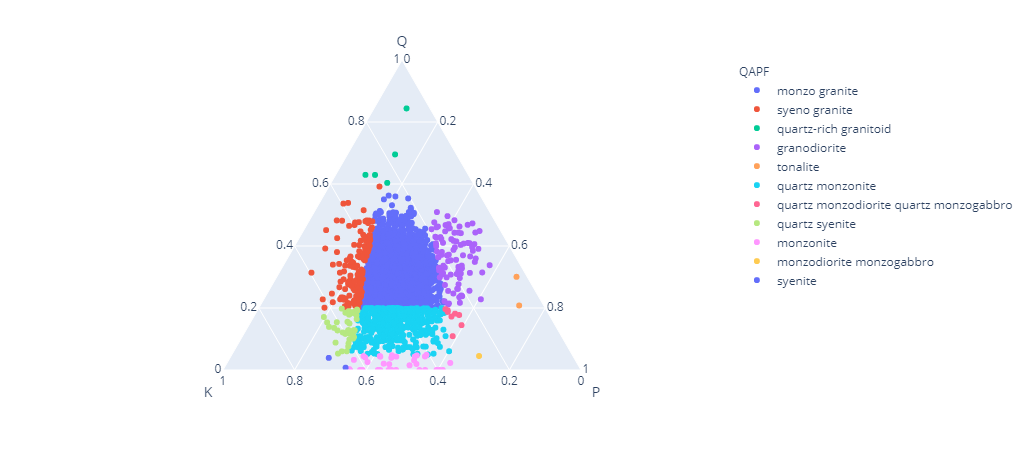

In [44]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_ternary(df_final1, a="Q", b="K", c="P", color="QAPF")

fig.write_image(f"../_FIGURES/qapf_ternary/qapf_ternary_all_Albite.pdf")
fig.show()

In [45]:
df_final1.to_excel("../_CIPW/QAPF_Albite.xlsx", index=True)

-------

# CIPWFULL nonprior-normalized data

## Convert to CIPWFULL format

In [4]:
mineralogy_original_nonnormalized = pd.read_excel("../_CLEANED/Vistelius_data_cleaned.xlsx", index_col=0)
# Only iterested in sample number and oxides
mineralogy_nonnormalized = mineralogy_original_nonnormalized[['SiO2', 'TiO2', 'Al2O3', 'Fe2O3','FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']]
mineralogy_nonnormalized = preproc.replace_nan(mineralogy_nonnormalized, "0.01")
mineralogy_nonnormalized

SiO2  TiO2  Al2O3 Fe2O3   FeO   MnO   MgO    CaO  Na2O   K2O  P2O5
1     80.80  0.04  10.16  0.61  1.72  0.01   0.4   0.55  2.00  3.59  0.01
2     80.00   0.1  10.10  0.17  0.56  0.02   0.4   0.35  2.30  5.10  0.05
3     79.92  0.05   9.89  0.16  1.73  0.02  0.12   0.14  0.75  6.15  0.01
4     79.65  0.04   9.64  1.15  0.75   0.1  0.45   0.67  3.71  4.25  0.01
5     79.18  0.08  10.24  0.64  2.60  0.04  0.05   1.25  1.52  3.08  0.01
...     ...   ...    ...   ...   ...   ...   ...    ...   ...   ...   ...
4655  51.09  0.39  19.44  4.09  4.97  0.22  3.79   8.02  4.12  2.01  0.59
4656  50.90     1  17.76  2.61  8.99   0.1  5.07   8.46  2.66  1.64  0.26
4657  50.40  1.15  18.03  4.21  5.22  0.16  5.84   8.45  2.68  2.24  0.47
4658  50.34  1.13  22.01  2.28  4.18   0.1  2.73   9.41  4.06  1.09  0.46
4659  50.19   0.8  19.45  5.33  4.10  0.01  4.94  11.33  2.84  0.75  0.01

[4659 rows x 11 columns]

In [5]:
mineralogy_nonnormalized.head()

SiO2  TiO2  Al2O3 Fe2O3   FeO   MnO   MgO   CaO  Na2O   K2O  P2O5
1  80.80  0.04  10.16  0.61  1.72  0.01   0.4  0.55  2.00  3.59  0.01
2  80.00   0.1  10.10  0.17  0.56  0.02   0.4  0.35  2.30  5.10  0.05
3  79.92  0.05   9.89  0.16  1.73  0.02  0.12  0.14  0.75  6.15  0.01
4  79.65  0.04   9.64  1.15  0.75   0.1  0.45  0.67  3.71  4.25  0.01
5  79.18  0.08  10.24  0.64  2.60  0.04  0.05  1.25  1.52  3.08  0.01

**remark**
changing the normalization factor in the convert_to_CIWFULL_format

In [6]:
cipw.convert_to_CIPWFULL_format(mineralogy_nonnormalized, "../_CIPW/test_non_normalized.txt", dataset_name="Vistelius (1995)")


## Extract results from CIPWFULL results file

In [8]:
df_final2 = cipw.extract_CIPW_results("../_CIPW/test_non_normalized_results_excel.txt")

In [9]:
df_final2

Q          P          K
 SAMPLE                                   
 1         52.549480  19.606893  21.237131
 2         45.940441  21.049118  30.394922
 3         50.739998   7.049744  36.730488
 4         41.407108  25.813721  25.008766
 5         54.633034  19.248688  18.441704
...              ...        ...        ...
 4655       0.000000  64.289820  12.030135
 4656       0.185820  54.481823   9.744568
 4657       0.497197  53.845579  13.390440
 4658       0.000000  74.613270   6.586514
 4659       2.255191  62.292595   4.442954

[4659 rows x 3 columns]

## QAPF classification

In [10]:
df_final2["QAPF"] = qapf.check_QAPF_region(df_final2)

In [11]:
df_final2["QAPF"].unique()

array(['monzo granite', 'syeno granite', 'quartz-rich granitoid',
       'granodiorite', 'tonalite',
       'quartz monzodiorite\nquartz monzogabbro', 'quartz monzonite',
       'monzonite', 'quartz diorite\nquartz gabbro\nquartz anorthosite',
       'monzodiorite monzogabbro', 'diorite gabbro anorthosite'],
      dtype=object)

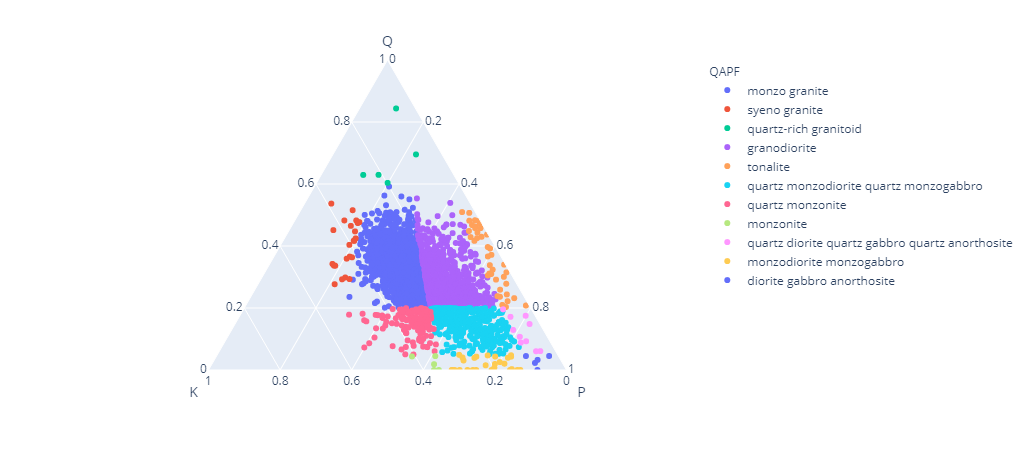

In [12]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_ternary(df_final2, a="Q", b="K", c="P", color="QAPF")

fig.write_image(f"../_FIGURES/qapf_ternary/non_normalized_qapf_ternary_all.pdf")
fig.show()

In [13]:
df_final2.to_excel("../_CIPW/non_normalized_QAPF.xlsx", index=True)

------

# CIPWFULL non_normalized data

## Convert to CIPWFULL format

In [46]:
original_nonnormalized = pd.read_excel("../_CLEANED/Vistelius_data_cleaned.xlsx", index_col=0)
# Only iterested in sample number and oxides
nonnormalized = original_nonnormalized[['SiO2', 'TiO2', 'Al2O3', 'Fe2O3','FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']]
nonnormalized = preproc.replace_nan(nonnormalized, "0.01")
nonnormalized

SiO2  TiO2  Al2O3 Fe2O3   FeO   MnO   MgO    CaO  Na2O   K2O  P2O5
1     80.80  0.04  10.16  0.61  1.72  0.01   0.4   0.55  2.00  3.59  0.01
2     80.00   0.1  10.10  0.17  0.56  0.02   0.4   0.35  2.30  5.10  0.05
3     79.92  0.05   9.89  0.16  1.73  0.02  0.12   0.14  0.75  6.15  0.01
4     79.65  0.04   9.64  1.15  0.75   0.1  0.45   0.67  3.71  4.25  0.01
5     79.18  0.08  10.24  0.64  2.60  0.04  0.05   1.25  1.52  3.08  0.01
...     ...   ...    ...   ...   ...   ...   ...    ...   ...   ...   ...
4655  51.09  0.39  19.44  4.09  4.97  0.22  3.79   8.02  4.12  2.01  0.59
4656  50.90     1  17.76  2.61  8.99   0.1  5.07   8.46  2.66  1.64  0.26
4657  50.40  1.15  18.03  4.21  5.22  0.16  5.84   8.45  2.68  2.24  0.47
4658  50.34  1.13  22.01  2.28  4.18   0.1  2.73   9.41  4.06  1.09  0.46
4659  50.19   0.8  19.45  5.33  4.10  0.01  4.94  11.33  2.84  0.75  0.01

[4659 rows x 11 columns]

In [47]:
nonnormalized.head()

SiO2  TiO2  Al2O3 Fe2O3   FeO   MnO   MgO   CaO  Na2O   K2O  P2O5
1  80.80  0.04  10.16  0.61  1.72  0.01   0.4  0.55  2.00  3.59  0.01
2  80.00   0.1  10.10  0.17  0.56  0.02   0.4  0.35  2.30  5.10  0.05
3  79.92  0.05   9.89  0.16  1.73  0.02  0.12  0.14  0.75  6.15  0.01
4  79.65  0.04   9.64  1.15  0.75   0.1  0.45  0.67  3.71  4.25  0.01
5  79.18  0.08  10.24  0.64  2.60  0.04  0.05  1.25  1.52  3.08  0.01

In [48]:
cipw.convert_to_CIPWFULL_format(nonnormalized, "../_CIPW/non_normalized.txt", dataset_name="Vistelius (1995)")

## Extract results from CIPWFULL results file

In [57]:
df_final3 = cipw.extract_CIPW_results("../_CIPW/non_normalized_results_excel.txt")

In [58]:
df_final3

Q          P          K
 SAMPLE                                   
 1         52.491692  16.922234  23.876872
 2         45.549942  19.460567  31.546194
 3         50.202160   6.345837  36.970329
 4         41.581013  25.922136  25.113802
 5         53.917336  12.860897  24.335756
...              ...        ...        ...
 4655       0.000000  34.859798  40.490882
 4656       0.184801  22.506571  41.366580
 4657       0.491476  22.675793  43.787015
 4658       0.000000  34.352131  45.053127
 4659       2.249557  24.029570  42.539151

[4659 rows x 3 columns]

## QAPF classification

In [59]:
df_final3["QAPF"] = qapf.check_QAPF_region(df_final3)

In [60]:
df_final3["QAPF"].unique()

array(['monzo granite', 'syeno granite', 'quartz-rich granitoid',
       'granodiorite', 'tonalite', 'quartz monzonite',
       'quartz monzodiorite\nquartz monzogabbro', 'quartz syenite',
       'monzonite', 'monzodiorite monzogabbro', 'syenite'], dtype=object)

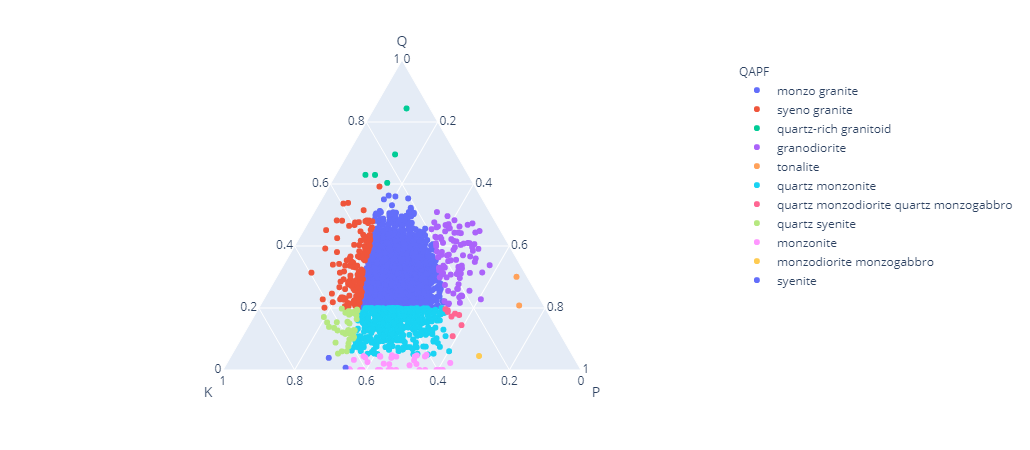

In [61]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_ternary(df_final3, a="Q", b="K", c="P", color="QAPF")

fig.write_image(f"../_FIGURES/qapf_ternary/non_normalized_totally_qapf_ternary_all.pdf")
fig.show()

In [62]:
df_final3.to_excel("../_CIPW/non_normalized_totally_QAPF.xlsx", index=True)

-----

# Check alkalinity

**Remark**
wanted to check if both calculations delivered the same results--> there are some differences

In [104]:
check_alkalinity = pd.read_excel("../_CIPW/test_excel.xlsx", index=1, usecols=[20])

In [105]:
check_alkalinity

ALKALINITY
0     PERALUMINOUS
1     PERALUMINOUS
2     PERALUMINOUS
3     PERALKALINE 
4     PERALUMINOUS
...            ...
4655  METALUMINOUS
4656  METALUMINOUS
4657  METALUMINOUS
4658  METALUMINOUS
4659    ALKALINITY

[4660 rows x 1 columns]

In [92]:
check_alkalinity.iloc[:, 0].value_counts().to_excel("../_PETRO/ASI_counts_CIPW.xlsx")

-----

# creating data to plot QAPF in Qgis

In [15]:
QAPF_plot = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols=[0, 5, 6])
QAPF = pd.read_excel("../_CIPW/QAPF.xlsx", index_col=0)
QAPF_plot_nonorm = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols=[0, 5, 6])
QAPF_nonorm = pd.read_excel("../_CIPW/non_normalized_QAPF.xlsx", index_col=0)
QAPF_plot_totnonorm = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols=[0, 5, 6])
QAPF_totnonorm = pd.read_excel("../_CIPW/non_normalized_totally_QAPF.xlsx", index_col=0)

In [16]:
QAPF_totnonorm

Q          P          K           QAPF
 SAMPLE                                                
1        52.491692  16.922234  23.876872  monzo granite
2        45.549942  19.460567  31.546194  monzo granite
3        50.202160   6.345837  36.970329  syeno granite
4        41.581013  25.922136  25.113802  monzo granite
5        53.917336  12.860897  24.335756  syeno granite
...            ...        ...        ...            ...
4655      0.000000  34.859798  40.490882      monzonite
4656      0.184801  22.506571  41.366580      monzonite
4657      0.491476  22.675793  43.787015        syenite
4658      0.000000  34.352131  45.053127      monzonite
4659      2.249557  24.029570  42.539151      monzonite

[4659 rows x 4 columns]

In [17]:
QAPF_plot.insert(2, "QAPF", QAPF['QAPF']) 
QAPF_plot_nonorm.insert(2, "QAPF", QAPF_nonorm['QAPF']) 
QAPF_plot_totnonorm.insert(2, "QAPF", QAPF_totnonorm['QAPF']) 

In [18]:
QAPF_plot_totnonorm

Latitude     Longitude           QAPF
1     44°31'30.0"  138°37'30.0"  monzo granite
2     54°12'10.0"   119°24'0.0"  monzo granite
3      62°36'0.0"   155°36'0.0"  syeno granite
4      61°35'0.0"    146°2'0.0"  monzo granite
5      68°55'0.0"   164°24'0.0"  syeno granite
...           ...           ...            ...
4655   66°42'0.0"   164°23'0.0"      monzonite
4656  46°56'30.0"    137°5'3.0"      monzonite
4657   58°12'0.0"   138°12'0.0"        syenite
4658   60°51'0.0"   147°31'0.0"      monzonite
4659   66°19'0.0"   165°30'0.0"      monzonite

[4659 rows x 3 columns]

In [19]:
QAPF_plot.to_excel("../_CIPW/QAPF_plot.xlsx", index=True)
QAPF_plot_nonorm.to_excel("../_CIPW/QAPF_plot_non_normalized.xlsx", index=True)
QAPF_plot_totnonorm.to_excel("../_CIPW/QAPF_plot_totnon_normalized.xlsx", index=True)

In [20]:
QAPF_plot.iloc[:, 2].value_counts().to_excel("../_CIPW/QAPF_count.xlsx")
QAPF_plot_nonorm.iloc[:, 2].value_counts().to_excel("../_CIPW/QAPF_count_non_normalized.xlsx")
QAPF_plot_totnonorm.iloc[:, 2].value_counts().to_excel("../_CIPW/QAPF_count_totnon_normalized.xlsx")

------

# checking QAPF with classification in Vistelius

**remark**
checked if there are a lot of differences and remarkable features between the two datasets. there are some differences, but that's logical i think, but in general it looked ok.  


In [7]:
Vist_check = pd.read_excel("../_Results/text_temp_cleaned_handmatig_finalversion.xlsx", index_col=0, usecols=[0, 8])
QAPF = pd.read_excel("../_CIPW/QAPF.xlsx", index_col=0)

In [9]:
QAPF

Q          P          K                        QAPF
 SAMPLE                                                             
1        52.549507  19.606903  21.237118               monzo granite
2        45.940433  21.049126  30.394911               monzo granite
3        50.739986   7.049767  36.730503               syeno granite
4        41.407116  25.813734  25.008740               monzo granite
5        54.633030  19.248727  18.441685               monzo granite
...            ...        ...        ...                         ...
4655      0.000000  64.289797  12.030162    monzodiorite monzogabbro
4656      0.185825  54.481821   9.744569    monzodiorite monzogabbro
4657      0.497182  53.845593  13.390444    monzodiorite monzogabbro
4658      0.000000  74.613235   6.586493  diorite gabbro anorthosite
4659      2.255181  62.292620   4.442956  diorite gabbro anorthosite

[4659 rows x 4 columns]

In [11]:
Vist_check.insert(1, "QAPF", QAPF['QAPF']) 

In [ ]:
Vist_check

In [13]:
Vist_check.to_excel("../_CIPW/QAPF_Check.xlsx", index=True)

-----